# **Abstract**:

The aim of the workbook is to  predict the quality of the wine by identifying the significant features using OLS model, plotting heatmap to understand the correlation among the independent variables and dependent variable. Finally, splitting the data into training(80%) and testing(20%) by employing the linear regression and decision tree regressor model to test the case.


### **1.** **Extracting the dataset from google drive** 

---
Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol



Output variable (based on sensory data):
12. quality (score between 0 and 10)











In [97]:
from google.colab import drive


In [98]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2. Importing the necessary libraries and reading data**

In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


* Pandas Python library offers data manipulation and data operations for numerical tables and time series. Pandas provide an easy way to create, manipulate, and wrangle the data.
* Numpy is essential for performing high level mathematical functions
* Scikit learn provides tools for machine learning algorithems and       statistical modelling. 
* Matplotlib is a library for creating static, animamted and interactive    visualization.
* Seaborn is a data visualization library for statistical graphics plotting in python.












In [100]:
#data = pd.read_csv('/content/drive/MyDrive/DSEM/winequalityN.csv')
url = 'https://raw.githubusercontent.com/pannaga3009/DSEM_WineQualityAnalysis_FeatureSelection/main/winequalityN.csv'
data = pd.read_csv(url)

### **3. Data Preprocessing**

In [101]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [71]:
data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


(Number of rows, Number of columns)

In [13]:
data.shape

(6497, 13)

To print the number of columns using pandas library and datatypes


In [14]:
print(data.columns)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [15]:
print(data.dtypes)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


To describe the dataset, essentially gives stats like mean, count etc. 



In [16]:
print(data.describe())

       fixed acidity  volatile acidity  ...      alcohol      quality
count    6487.000000       6489.000000  ...  6497.000000  6497.000000
mean        7.216579          0.339691  ...    10.491801     5.818378
std         1.296750          0.164649  ...     1.192712     0.873255
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]


**3.1 Checking for null values**

In [ ]:
print(data["alcohol"].isnull().sum())

0


In [ ]:
print(data["fixed acidity"].isnull().sum())

10


To select by iloc and specific columns with index number:
Purely integer-location based indexing for selection by position.


In [72]:
print(data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [ ]:
print(data[['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates']].isnull().sum())

type                 0
fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64


***We can see that independent variables like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH and sulphates has null values.***

In [102]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

**3.2 To replace null values with mean:**

In [103]:
col_NA_to_mean = data.mean()
data = data.fillna(col_NA_to_mean)


In [104]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
data['type'].unique()

array(['white', 'red'], dtype=object)

## **4. Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40722cfed0>,
      dtype=object)

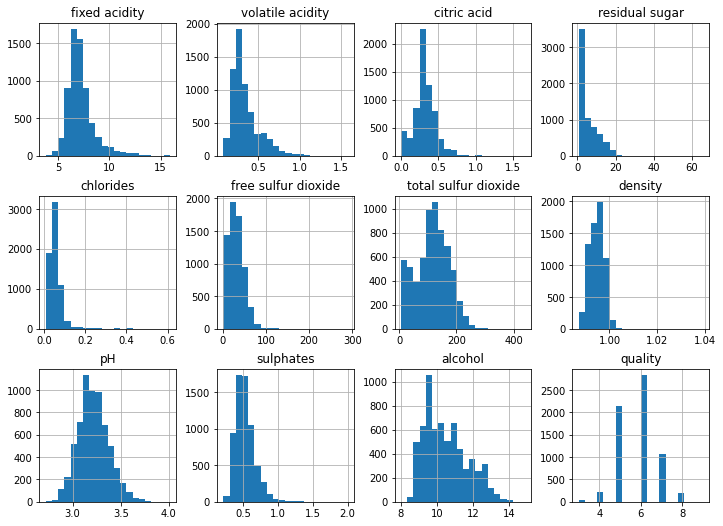

In [21]:
data.hist(figsize=(12,12), layout=(4,4), bins=20)

Plotting histogram of type:


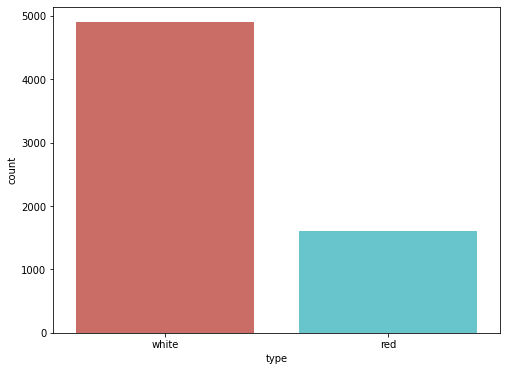

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=data, palette='hls')
plt.show()

### **4.1 Encoding type of the wine**
 Red = 0
White = 1

In [105]:
data.type = data.type.map({'white' : 1, 'red' : 0})


In [106]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


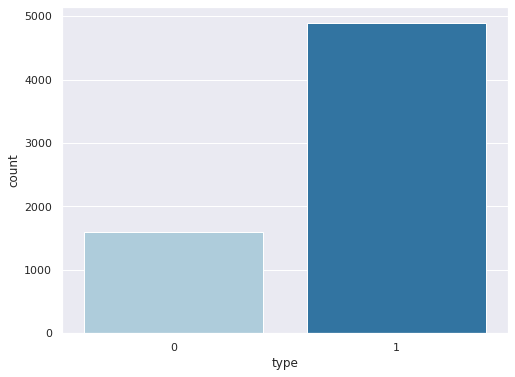

In [25]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x="type", data=data, palette = "Paired")
plt.show()

Plotting the count plot for quality (target/dependant variable):

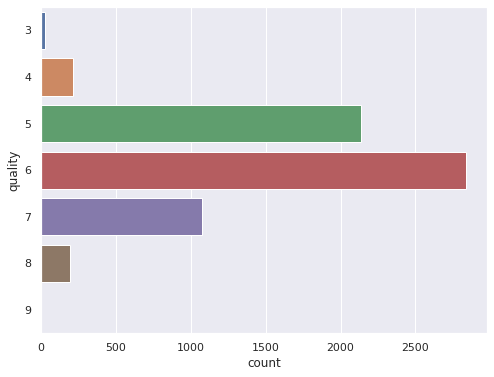

In [26]:
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.countplot(y ='quality', data=data)

**Plotting of the ranges and the distributions of the predictor variables:**

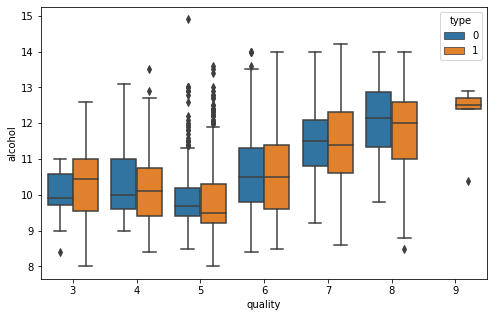

In [80]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "alcohol", hue = "type",  data = data)



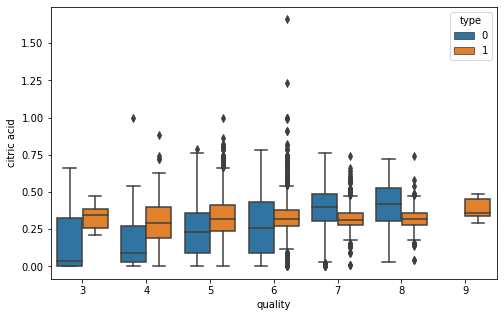

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "citric acid", hue = "type",  data = data)


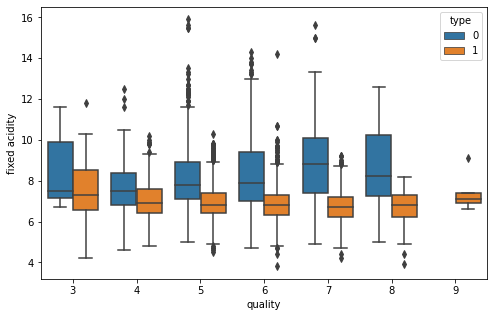

In [82]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "fixed acidity", hue = "type",  data = data)

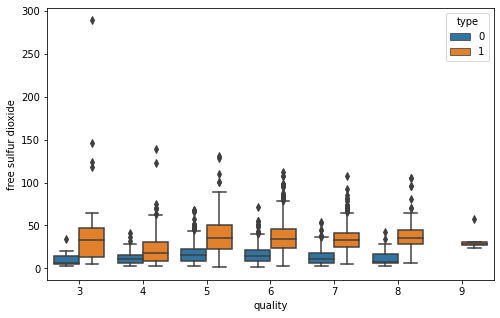

In [83]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "free sulfur dioxide", hue = "type",  data = data)

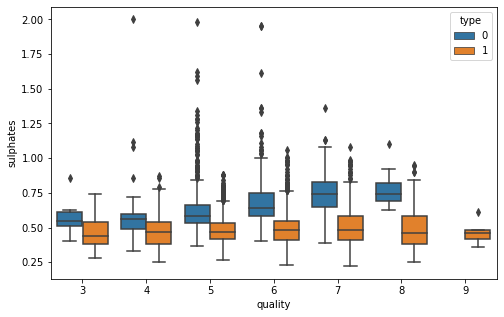

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "sulphates", hue = "type",  data = data)

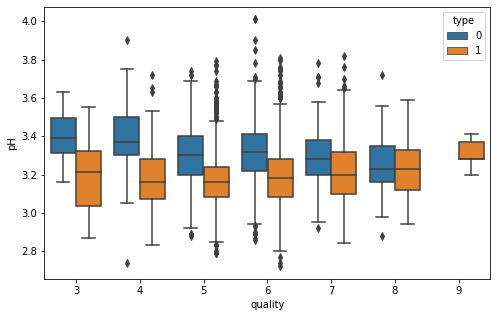

In [85]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "pH", hue = "type",  data = data)

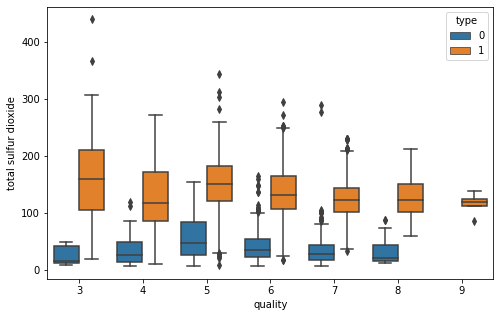

In [86]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "total sulfur dioxide", hue = "type",  data = data)

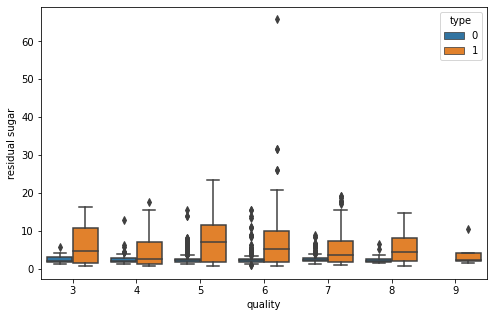

In [87]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "residual sugar", hue = "type",  data = data)

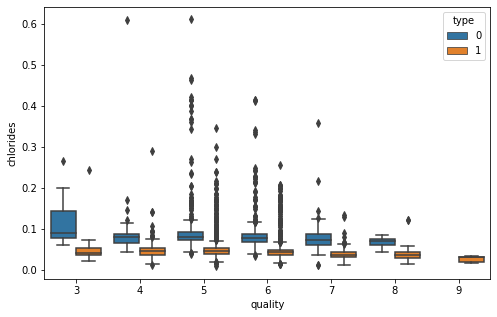

In [88]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "chlorides", hue = "type",  data = data)

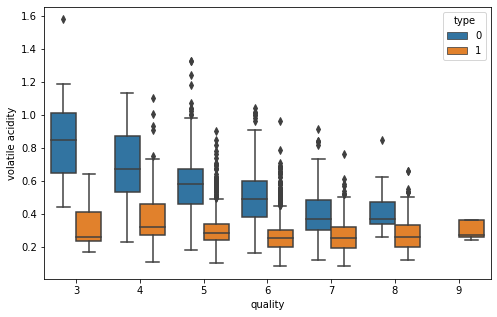

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "quality", y = "volatile acidity", hue = "type",  data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


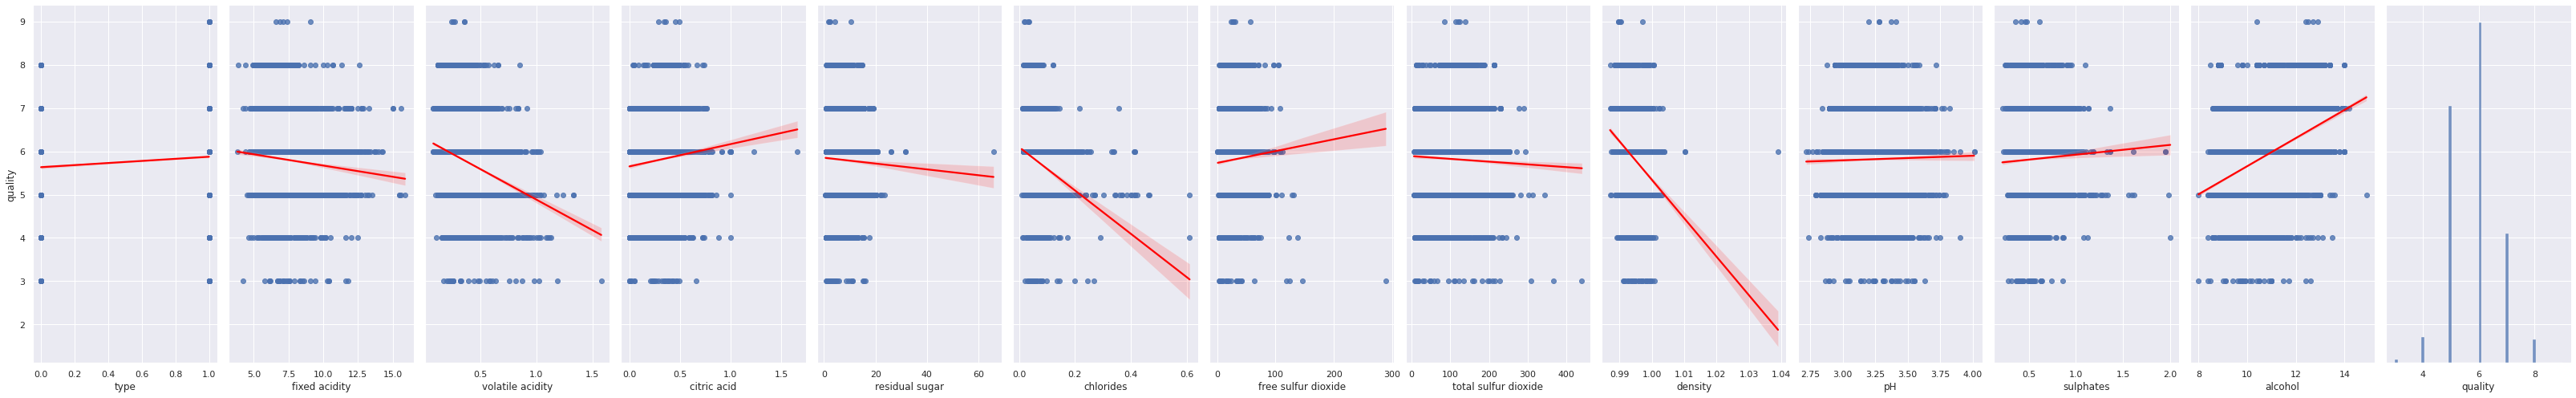

In [27]:
features = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
x = data[features]
y = data['quality']

sns.pairplot(data,x_vars = features, y_vars='quality', kind ='reg',plot_kws={'line_kws':{'color':'red'}}, size=7, aspect = 0.5)

## **5. Splitting the data to training dataset and testing dataset**

In [107]:
#Training dataset = 80%
#Testing dataset = 20%
from sklearn.model_selection import train_test_split
x=data.drop(['quality'], axis = 1)
y =data['quality']
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 45)


Displaying the training and the testing dataset

In [29]:
print(x_train.head(5))
print(x_train.columns)
#x_train.columns
#print(y_train.head(5))

print(y_train.head(5))
print(y_train)




      type  fixed acidity  volatile acidity  ...    pH  sulphates  alcohol
5933     0           10.1              0.37  ...  3.17       0.65     10.6
1405     1            6.3              0.39  ...  3.15       0.35     10.2
2915     1            6.9              0.14  ...  3.03       0.54     11.4
1049     1            6.1              0.37  ...  3.31       0.62     12.6
4606     1            6.9              0.29  ...  3.04       0.58     11.2

[5 rows x 12 columns]
Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
5933    7
1405    4
2915    6
1049    6
4606    5
Name: quality, dtype: int64
5933    7
1405    4
2915    6
1049    6
4606    5
       ..
5179    7
1340    6
3864    7
5234    6
4310    6
Name: quality, Length: 5197, dtype: int64


In [30]:
print(x_test.head(5))
print(x_test.columns)


print(y_test.head(5))

      type  fixed acidity  volatile acidity  ...    pH  sulphates  alcohol
576      1            8.2              0.23  ...  3.13       0.50     10.2
376      1            6.4              0.31  ...  3.32       0.51     10.4
3418     1            7.2              0.37  ...  3.10       0.51      9.8
4815     1            6.2              0.76  ...  3.20       0.94     13.7
3550     1            7.2              0.14  ...  3.04       0.67     10.0

[5 rows x 12 columns]
Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
576     6
376     7
3418    6
4815    7
3550    6
Name: quality, dtype: int64


## **6. Normalizing the data**

In [108]:
from sklearn import preprocessing


# Create x, where x the 'scores' column's values as floats
x = data[['type','fixed acidity','residual sugar','density','pH','sulphates','free sulfur dioxide','total sulfur dioxide','alcohol','quality']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['type','fixed acidity','residual sugar','density','pH','sulphates','free sulfur dioxide','total sulfur dioxide','alcohol','quality']] = pd.DataFrame(x_scaled)

In [32]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.27,0.36,0.308282,0.045,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.5
1,1.0,0.206612,0.30,0.34,0.015337,0.049,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.5
2,1.0,0.355372,0.28,0.40,0.096626,0.050,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5
3,1.0,0.280992,0.23,0.32,0.121166,0.058,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5
4,1.0,0.280992,0.23,0.32,0.121166,0.058,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5


## **7. Feature Selection**

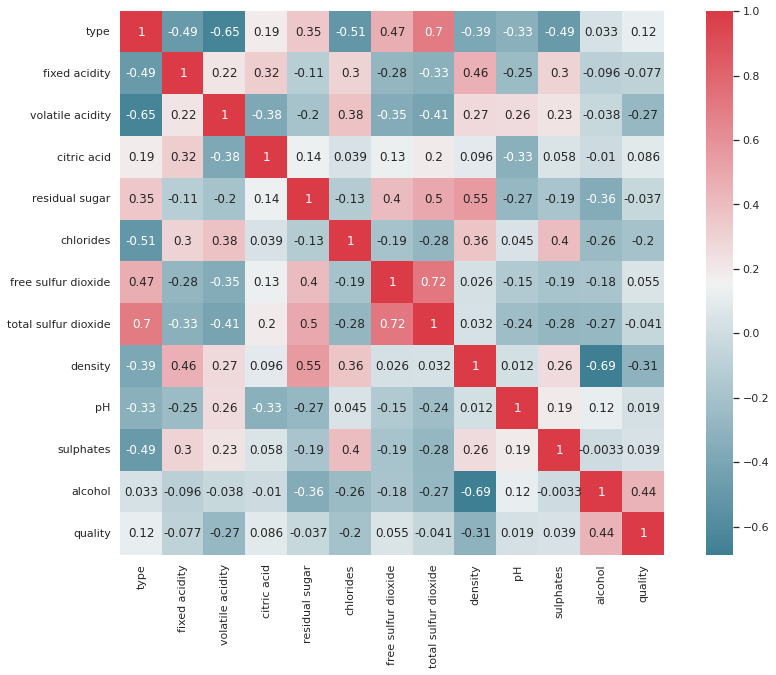

In [109]:
# correlation

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(13,13))

f, axis = plt.subplots(figsize=(15, 10))
#sns.palplot(sns.diverging_palette(220, 20, n=7))
#sns.heatmap(df.corr(),cmap='coolwarm')
correlation = data.corr()
#correlation.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
          square=True, ax=axis, annot = True)
plt.show()




From the above observations we can follow that:



1. A strong positive correlation between alcohol(independent variable) and quality(target variable).
2. A moderate positive correlation between type, citric acid, free sulphur dioxide, ph, sulphates and quality. 
3. A slight positive correlation between type, total sulphur dioxide and citric acid. Similarly between the  volatile acidity, ph with sulphates. 
4. A strong negative correlations between alcohol and density. Similarly between volatile acidity, sulphates, chlorides, ph with type. 
5. A slight negative correlations between residual sugar and quality, fixed acidity and quality, total sulphur dioxide and quality. 
6. A strong negative correlations between density and quality,  chlorides and quality, volatile acidity and quality.





In [110]:
cor_target = abs(correlation["quality"])
print(cor_target)
#Selecting highly correlated features
sig_features = cor_target[cor_target>0.2]
print("\Relevant Features:\n",sig_features)

type                    0.119323
fixed acidity           0.076967
volatile acidity        0.265838
citric acid             0.085699
residual sugar          0.036819
chlorides               0.200818
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
density                 0.305858
pH                      0.019356
sulphates               0.038713
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64
\Relevant Features:
 volatile acidity    0.265838
chlorides           0.200818
density             0.305858
alcohol             0.444319
quality             1.000000
Name: quality, dtype: float64


### **Ordinary least squares**
It estimates the parameters in a regression model by minimizing the sum of the squared residuals. This method draws a line through the data points that minimizes the sum of the squared differences between the observed values and the corresponding fitted values.



In [111]:
#OLS model
import statsmodels.api as sm


model = sm.OLS(data['quality'],data[['type','fixed acidity','residual sugar','density','pH','sulphates','free sulfur dioxide','total sulfur dioxide','citric acid','alcohol','volatile acidity','chlorides']]).fit();
summary = model.summary()
print(summary)



                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              7509.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        17:56:23   Log-Likelihood:                          4166.6
No. Observations:                6497   AIC:                                     -8309.
Df Residuals:                    6485   BIC:                                     -8228.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

A predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

In [112]:
#OLS model after dropping residual sugar and citric acid
import statsmodels.api as sm


model = sm.OLS(data['quality'],data[['type','fixed acidity','density','pH','sulphates','free sulfur dioxide','total sulfur dioxide','alcohol','volatile acidity','chlorides']]).fit();
summary = model.summary()
print(summary)


                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              9013.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        17:56:31   Log-Likelihood:                          4166.5
No. Observations:                6497   AIC:                                     -8313.
Df Residuals:                    6487   BIC:                                     -8245.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

**The useful independent variables are alcohol, type, free sulphur dioxide, pH, sulphates, volatile acidity, total sulfur dioxide and fixed acidity to predict the quality of the wine**




### **Linear Regression:**

This model is used to determine the best relationship between the target variable(y) and independent variable(x). 

It models the relationship between two variables by fitting a linear  equation to the observed data. 

Equation:
**y = mx + c**

y = Target variable,
x = Independent variable,
m = slope,
c = y intercept.

Linear regression predicts the dependant variable $y$ assuming it has a linear relationship with predictor variable(s) $x$ or $x_1, x_2, ,,, x_n$.

$$y = \beta_0 + \beta_1 x + \varepsilon .$$
Simple regression use only one predictor variable $x$. Mulitple regression uses a set of predictor variables $x_1, x_2, ,,, x_n$.

The parameters $\beta_0$ and $\beta_1$ determine the intercept and the slope of the line respectively. The intercept $\beta_0$ represents the predicted value of $y$ when $x=0$. The slope $\beta_1$ represents the predicted increase in $Y$ resulting from a one unit increase in $x$.


Here,
$b$ = $\beta_1$ = slope,
 $\beta_0$ = $Y$ intercept, 
$\varepsilon$ = error term.






In [113]:
# start with modelling
# split data into train and test

#Training dataset is 80%
#Test dataset is 20%

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(x_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
# Make predictions using the testing set
y_pred = regressor.predict(x_test)


# The mean squared error
print('Mean squared error on the Test dataset : %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2 score for Test dataset : %.2f'% r2_score(y_test, y_pred))

Mean squared error on the Test dataset : 0.55
R2 score for Test dataset : 0.28


### **Decision Tree Regressor:**


The decision tree models can be applied to all those data which contains numerical features and categorical features. Decision trees are good at capturing non-linear interaction between the features and the target variable.

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. The ID3 algorithm can be used to construct a decision tree for regression by replacing Information Gain with Standard Deviation Reduction.


In [115]:
from sklearn.tree import DecisionTreeRegressor




In [116]:
#Fitting the regression model 
x=data.drop(['quality','residual sugar','citric acid'], axis = 1)
y=data['quality']
regression = DecisionTreeRegressor(max_depth=4)
regression.fit(x_train,y_train)

#Predict
y_pred = regression.predict(x_test)
print(y_pred)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


[6.17976032 5.65898618 5.19066937 ... 5.46787149 6.50956938 5.43992248]


,Actual,Predicted
2691,6,6.179760
5843,7,5.658986
5509,5,5.190669
2880,5,6.179760
3286,7,6.179760
...,...,...
6100,8,6.147651
6217,6,5.190669
6366,7,5.467871
3253,8,6.509569


def predict(X, check_input=True)

Predict class or regression value for X.
 For a regression model, the predicted value based on X is returned.

 y : array-like of shape (n_samples,) or (n_samples, n_outputs)
  The predicted classes, or the predict values.



### **References:**

1. www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/
2. www.github.com/abhi-gm/Machine-Learning-Workshop
2. www.scikit-learn.org/stable/modules
3. www.statisticsbyjim.com/glossary/ordinary-least-squares
4. www.towardsdatascience.com
5. www.blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
6. www.machinelearningmastery.com/make-predictions-scikit-learn/





### **License:**


Copyright 2020 Pannaga Veeramohan, Be Incorporated.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification are permitted.

THIS SOFTWARE IS PROVIDED BY THE AUTHOR "AS IS" AND ANY EXPRESS OR
IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES
OF TITLE, NON-INFRINGEMENT, MERCHANTABILITY AND FITNESS FOR A PARTICULAR
PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY
DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES.
